In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('placement.csv')
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [3]:
X = df.iloc[:,0:1].values
y = df.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=5)

In [5]:
class simpleLR:
    def __init__(self):
        self.m = None
        self.b = None


    def fit(self,X_train,y_train):
        num = 0
        den = 0

        for i in range(X_train.shape[0]):

            num = num + (X_train[i]-X_train.mean())*(y_train[i]-y_train.mean())

            den = den + (X_train[i]-X_train.mean())*(X_train[i]-X_train.mean())


        self.m = num / den 
        self.b = y_train.mean() - (self.m * X_train.mean())
    
    def predict(self,X_test):
        return self.m * X_test + self.b 
        

In [6]:
lr = simpleLR()

lr.fit(X_train,y_train)

In [7]:
lr.predict(X_test[0])

array([3.23691461])

In [8]:
lr.m

array([0.59340915])

In [9]:
lr.b

array([-1.14837897])

In [10]:
lr.m *78 + lr.b

array([45.13753439])

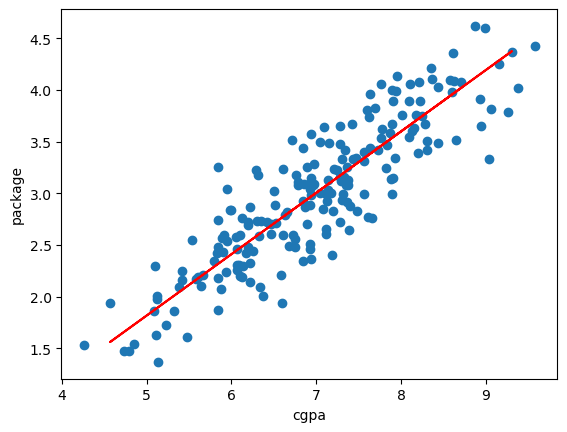

In [11]:
plt.scatter(df['cgpa'],df['package']) 
plt.plot(X_train[:],lr.predict(X_train),color='red')
plt.xlabel('cgpa')
plt.ylabel('package')
plt.show()